In [14]:
# Importo librerias que voy a usar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv('./Datasets\Call_center_limpio.csv')
df.head(5)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,...,outcome,ser_start,ser_exit,ser_time,id_unique,month,vru_entry_corr,vru_exit_corr,vru_time_corr,q_time_real
0,AA0101,33116,9664491.0,2,PS,1999-01-01,2024-08-16 00:00:31,2024-08-16 00:00:36,5,2024-08-16 00:00:36,...,HANG,2024-08-16 00:00:00,2024-08-16 00:00:00,0,AA0101 33116,1,2024-08-16 00:00:31,2024-08-16 00:00:36,5,63
1,AA0101,33117,0.0,0,PS,1999-01-01,2024-08-16 00:34:12,2024-08-16 00:34:23,11,2024-08-16 00:00:00,...,HANG,2024-08-16 00:00:00,2024-08-16 00:00:00,0,AA0101 33117,1,2024-08-16 00:34:12,2024-08-16 00:34:23,11,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,2024-08-16 06:55:20,2024-08-16 06:55:26,6,2024-08-16 06:55:26,...,AGENT,2024-08-16 06:55:43,2024-08-16 06:56:37,54,AA0101 33118,1,2024-08-16 06:55:20,2024-08-16 06:55:26,6,0
3,AA0101,33119,0.0,0,PS,1999-01-01,2024-08-16 07:41:16,2024-08-16 07:41:26,10,2024-08-16 00:00:00,...,AGENT,2024-08-16 07:41:25,2024-08-16 07:44:53,208,AA0101 33119,1,2024-08-16 07:41:16,2024-08-16 07:41:26,10,0
4,AA0101,33120,0.0,0,PS,1999-01-01,2024-08-16 08:03:14,2024-08-16 08:03:24,10,2024-08-16 00:00:00,...,AGENT,2024-08-16 08:03:23,2024-08-16 08:05:10,107,AA0101 33120,1,2024-08-16 08:03:14,2024-08-16 08:03:24,10,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438402 entries, 0 to 438401
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   vru.line        438402 non-null  object
 1   call_id         438402 non-null  int64 
 2   customer_id     438402 non-null  object
 3   priority        438402 non-null  int64 
 4   type            438402 non-null  object
 5   date            438402 non-null  object
 6   vru_entry       438402 non-null  object
 7   vru_exit        438402 non-null  object
 8   vru_time        438402 non-null  int64 
 9   q_start         438402 non-null  object
 10  q_exit          438402 non-null  object
 11  q_time          438402 non-null  int64 
 12  outcome         438402 non-null  object
 13  ser_start       438402 non-null  object
 14  ser_exit        438402 non-null  object
 15  ser_time        438402 non-null  int64 
 16  id_unique       438402 non-null  object
 17  month           438402 non-nu

In [23]:
#Transformamos los tipos de datos
df['vru.line']  = df['vru.line'].astype('str')
df['call_id']   = df['call_id'].astype('str')
df['priority']  = df['priority'].astype('category')
df['type']      = df['type'].astype('category')
df['date']      = pd.to_datetime(df['date'])
df['vru_entry'] = pd.to_datetime(df['vru_entry'])
df['vru_exit']  = pd.to_datetime(df['vru_exit'])
df['q_start']   = pd.to_datetime(df['q_start'])
df['q_exit']    = pd.to_datetime(df['q_exit'])
df['outcome']   = df['outcome'].astype('category')
df['ser_start'] = pd.to_datetime(df['ser_start'])
df['ser_exit']  = pd.to_datetime(df['ser_exit'])
df['vru_entry'] = pd.to_datetime(df['vru_entry'])

In [24]:
# Se crea un dataframe auxiliar para tener en cuenta solo los clientes prioritarios considerando los tiempos reales de espera
df_priority_2 = df[df['priority'] == 2]
df_priority_2['q_time_real'].describe()

count    135352.000000
mean         32.424486
std          74.576030
min           0.000000
25%           0.000000
50%           0.000000
75%          27.000000
max         893.000000
Name: q_time_real, dtype: float64

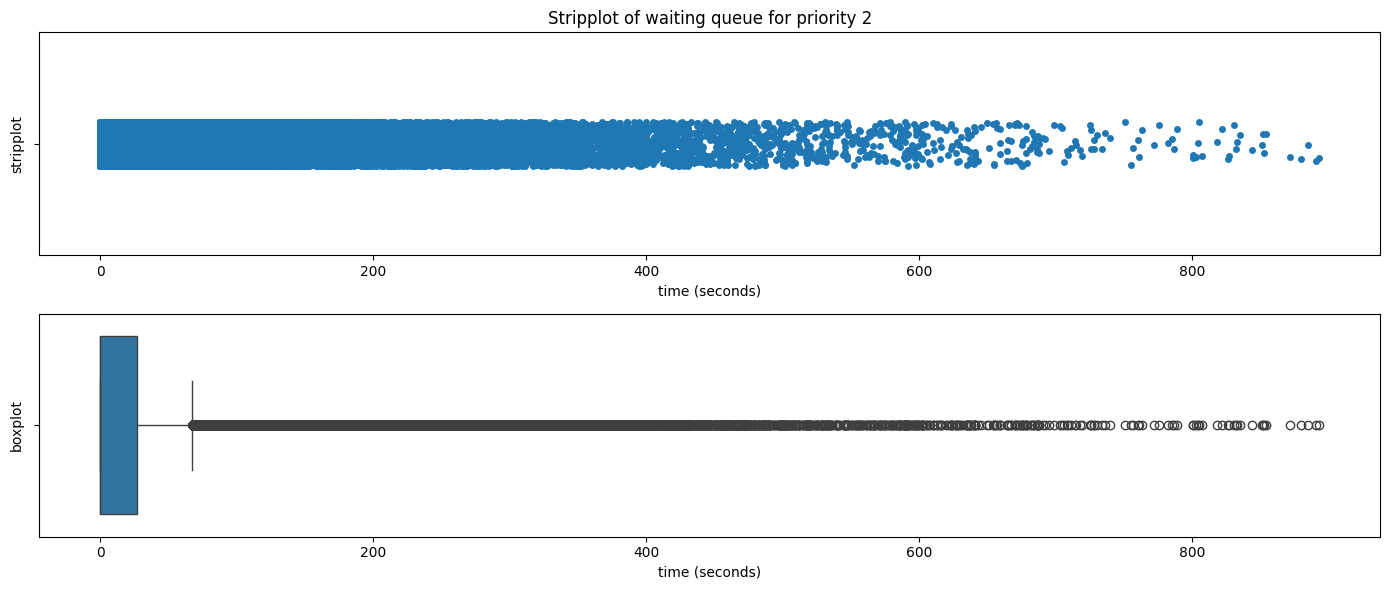

In [25]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_priority_2, x='q_time_real', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue for priority 2')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_priority_2, x='q_time_real', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

plt.tight_layout()

In [ ]:
df_priority_2['ser_time'].describe()

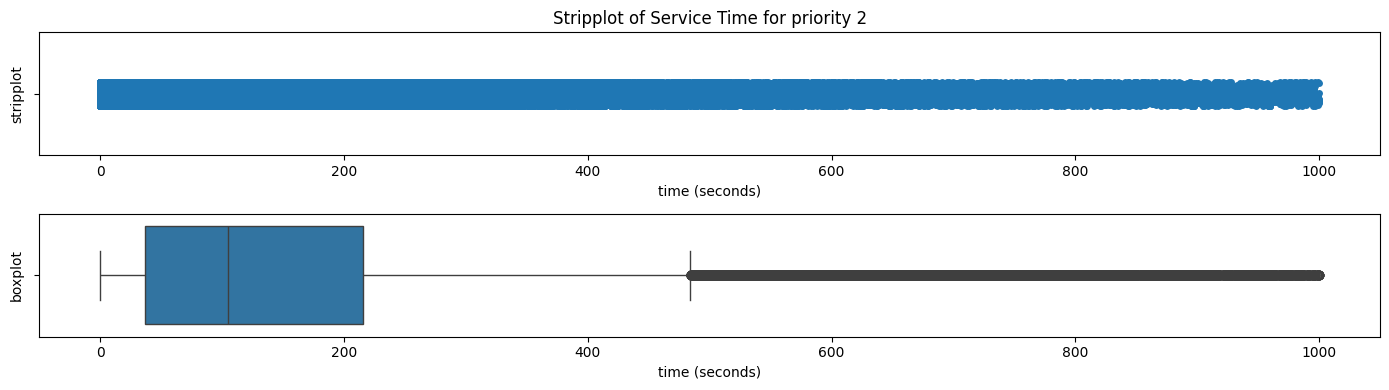

In [26]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_priority_2, x='ser_time', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of Service Time for priority 2')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_priority_2, x='ser_time', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

plt.tight_layout()

In [27]:
# Se agrega una columna al dataframe haciendo las dos categorías de clientes
def label_priority(row):
    if row == 2:
        return 'priority'
    else:
        return 'normal'
    
df['priority_label'] = df['priority'].apply(label_priority)

In [28]:
df.groupby('priority_label')['q_time_real'].agg(['mean'])

,mean
priority_label,
normal,45.767375
priority,32.424486


In [29]:
# Cantidad de llamadas por mes
avg_montly = df.groupby('month')['month'].agg(['count'])
avg_montly

,count
month,
1,31242
2,33004
3,38338
4,31521
5,38968
6,37498
7,38587
8,41582
9,30821


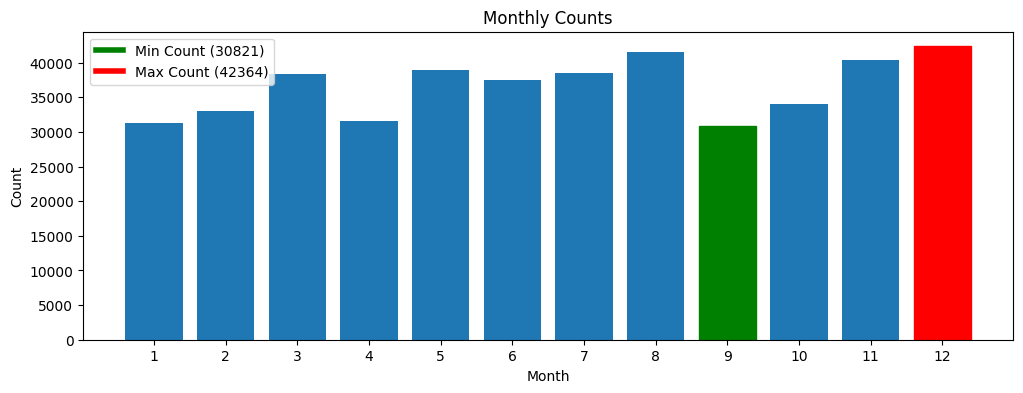

In [30]:
# Cuenta los registros y convierte la estructura
monthly_counts = df.groupby('month')['month'].count()
monthly_counts = monthly_counts.reset_index(name='count')

#Busca máximo y mínimo
min_count = monthly_counts['count'].min()
max_count = monthly_counts['count'].max()

plt.figure(figsize=(12, 4))
bars = plt.bar(monthly_counts['month'], monthly_counts['count'])

# Asigna los colores a máximo y mínimo valor
for bar in bars:
    if bar.get_height() == min_count:
        bar.set_color('green')
    elif bar.get_height() == max_count:
        bar.set_color('red')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Counts')
plt.xticks(monthly_counts['month'])
plt.legend(handles=[
    plt.Line2D([0], [0], color='green', lw=4, label=f'Min Count ({min_count})'),
    plt.Line2D([0], [0], color='red', lw=4, label=f'Max Count ({max_count})')
])

plt.show()

In [31]:
# Promedio de llamadas mensuales
avg_montly.mean()

count    36533.5
dtype: float64

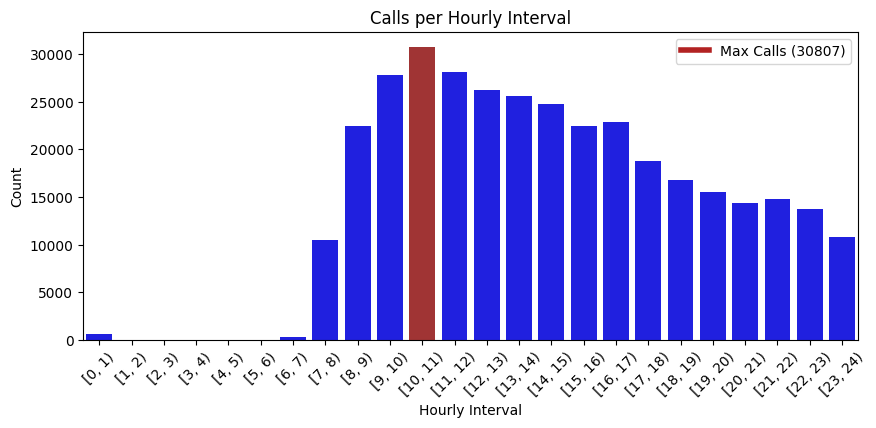

In [32]:
# Filtra las llamadas con etiqueta "AGENT"
filtered_df = df[df['outcome'] == 'AGENT']

# Franjas horarias
filtered_df['hourly_interval'] = pd.cut((filtered_df['ser_start'] - filtered_df['ser_start'].dt.normalize()) / pd.Timedelta(hours=1), 
                                        bins=range(0, 25), right=False)
calls_per_hour = filtered_df['hourly_interval'].value_counts().sort_index()

# Define los dos valores más altos
max_calls_hour = calls_per_hour.idxmax()

#Setea los colores
custom_palette = sns.color_palette(['blue' if x != max_calls_hour else 'firebrick' for x in calls_per_hour.index])

plt.figure(figsize=(10, 4))
sns.barplot(x=calls_per_hour.index, y=calls_per_hour.values, palette=custom_palette)

plt.xlabel('Hourly Interval')
plt.ylabel('Count')
plt.title('Calls per Hourly Interval')
plt.legend(handles=[
    plt.Line2D([0], [0], color='firebrick', lw=4, label=f'Max Calls ({calls_per_hour[max_calls_hour]})')
])

plt.xticks(rotation=45)
plt.show()

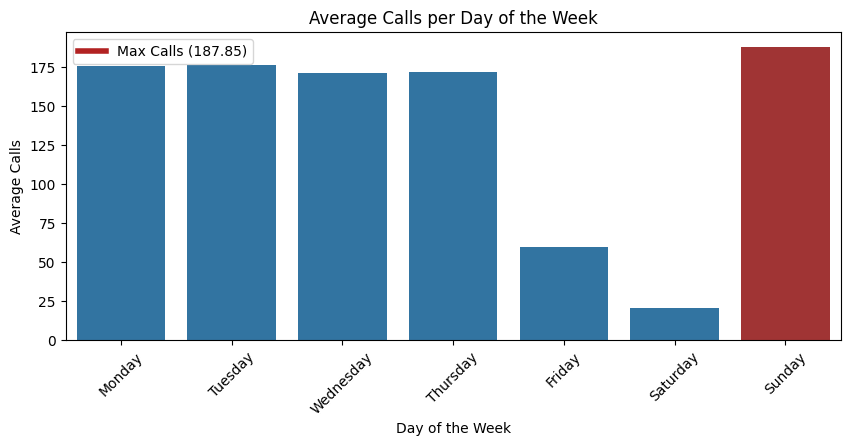

In [33]:
# Filtra las llamadas con etiqueta "AGENT"
filtered_df = df[df['outcome'] == 'AGENT']

# Extrae el día de la semana y calcula el promedio de llamadas
filtered_df['weekday'] = filtered_df['date'].dt.weekday
calls_per_weekday = filtered_df.groupby('weekday')['date'].count() / filtered_df['date'].nunique()

# Etiquetas
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setea colores
custom_palette = sns.color_palette(['#1f77b4'] * len(calls_per_weekday))
max_calls_weekday = calls_per_weekday.idxmax()
custom_palette[max_calls_weekday] = 'firebrick'

# Crear un gráfico de barras
plt.figure(figsize=(10, 4))
bars = sns.barplot(x=weekday_names, y=calls_per_weekday, palette=custom_palette)

plt.xlabel('Day of the Week')
plt.ylabel('Average Calls')
plt.title('Average Calls per Day of the Week')

plt.xticks(rotation=45)

# OPara setear el color en el máximo
max_calls_value = calls_per_weekday.max()
plt.legend(handles=[
    plt.Line2D([0], [0], color='firebrick', lw=4, label=f'Max Calls ({max_calls_value:.2f})')
])

plt.show()

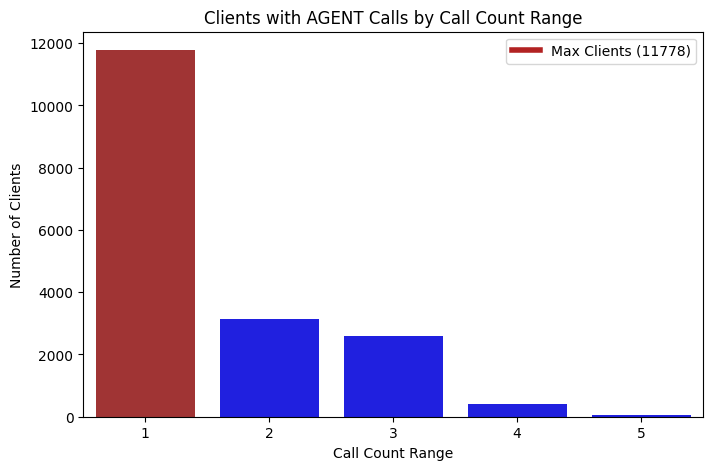

In [34]:
# Filtra las llamadas con la categoría "AGENT" y calcula la cantidad de llamadas por cliente
agent_calls = df[df['outcome'] == 'AGENT']
calls_per_client = agent_calls.groupby('customer_id').size()

# Rangos y etiquetas
bins = [0, 5, 10, 50, 365, float('inf')]
labels = ['1', '2', '3', '4', '5']

# Clasifica a los clientes según los rangos y los cuenta
calls_per_client['call_count_range'] = pd.cut(calls_per_client, bins=bins, labels=labels, right=False)
clients_per_range = calls_per_client['call_count_range'].value_counts().sort_index()

# Calcula el valor máximo y setea el color
max_calls_range = clients_per_range.idxmax()
custom_palette = sns.color_palette(['blue' if x != max_calls_range else 'firebrick' for x in clients_per_range.index])

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=clients_per_range.index, y=clients_per_range.values, palette=custom_palette)

plt.xlabel('Call Count Range')
plt.ylabel('Number of Clients')
plt.title('Clients with AGENT Calls by Call Count Range')

plt.xticks()
max_calls_value = clients_per_range.max()
plt.legend(handles=[
    plt.Line2D([0], [0], color='firebrick', lw=4, label=f'Max Clients ({max_calls_value})')
])
plt.show()

In [35]:
result_df = pd.DataFrame({
    'Clients': clients_per_range,
    'Percentage': round(((clients_per_range / clients_per_range.sum()) * 100),2)
})
result_df

,Clients,Percentage
1,11778,65.45
2,3153,17.52
3,2598,14.44
4,416,2.31
5,50,0.28


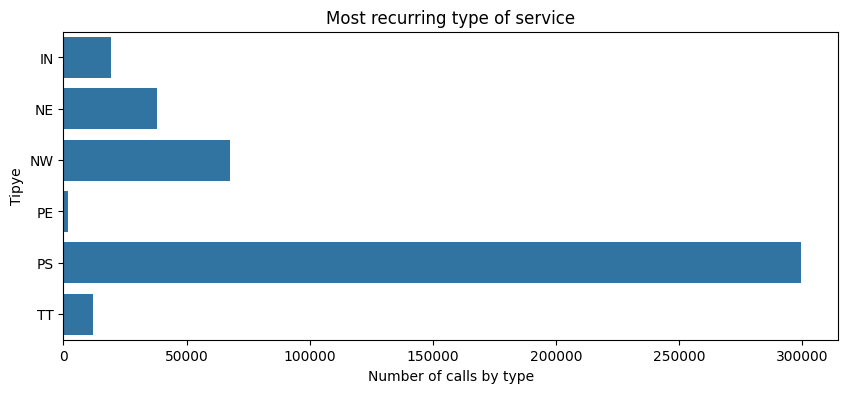

In [36]:
cantidad = df['type'].value_counts()

fig = plt.figure(figsize=(10, 4))
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Number of calls by type') ; plt.ylabel('Tipye') ; plt.title('Most recurring type of service')
plt.show()

In [37]:
result_df = pd.DataFrame({
    'Count': df['type'].value_counts(),
    'Percentage': (cantidad / cantidad.sum()) * 100
})
round(result_df, 2)

,Count,Percentage
type,,
PS,299679,68.36
NW,67495,15.40
NE,38030,8.67
IN,19220,4.38
TT,12189,2.78
PE,1789,0.41
